In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from shapely.geometry import LineString


In [57]:
sigma = 50 #IFT, dyn/cm
phi_lab = 0.16
k_lab = 80
phi = 0.19 #porosity
k = 120 #md
pc_lab = {'Sw':[1.0,0.8,0.6,0.4,0.25,0.23,0.21,0.20],
      'Pc_lab':[0.5,0.6,0.75,1.05,1.50,1.75,3.0,8.0]}
df = pd.DataFrame(pc_lab)
df

,Sw,Pc_lab
0,1.00,0.50
1,0.80,0.60
2,0.60,0.75
3,0.40,1.05
4,0.25,1.50
5,0.23,1.75
6,0.21,3.00
7,0.20,8.00


In [58]:
capillary_pressure=pd.DataFrame({'Sw':[25.6,25.6,25.7,26.0,27.0,29.0,31.0,34.2,37.8,41.5,46.2],'depth':[4000,4100,4200,4300,4440,4500,4600,4700,4800,4900,5000]})
capillary_pressure


,Sw,depth
0,25.6,4000
1,25.6,4100
2,25.7,4200
3,26.0,4300
4,27.0,4440
5,29.0,4500
6,31.0,4600
7,34.2,4700
8,37.8,4800
9,41.5,4900


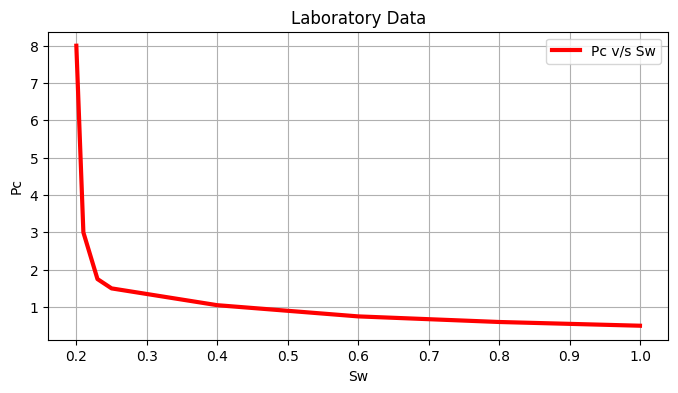

In [59]:
plt.style.use('default')

plt.figure(figsize=(8,4))

plt.plot(df['Sw'],df['Pc_lab'],label='Pc v/s Sw',color='red',linewidth=3)

plt.title('Laboratory Data')
plt.xlabel('Sw')
plt.ylabel('Pc')
plt.legend()
plt.grid()

In [61]:
df['J'] = 0.21645*(df['Pc_lab']/sigma)*(np.sqrt(k_lab/phi_lab))

In [62]:
df['Pc_reservoir'] = (df['J']*sigma)/(0.21645*np.sqrt(k/phi))

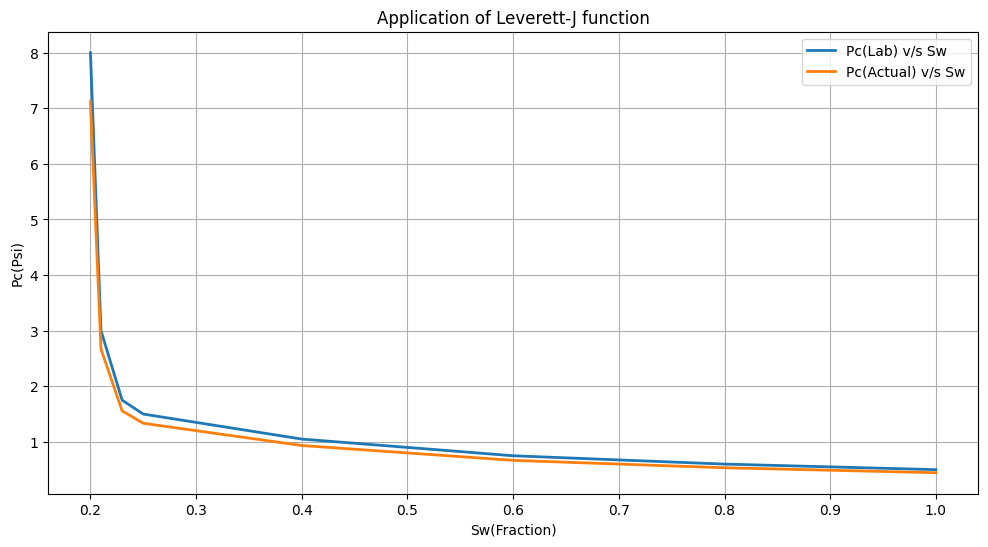

In [63]:
plt.style.use('default')
plt.figure(figsize=(12,6))
plt.plot(df['Sw'],df['Pc_lab'],label='Pc(Lab) v/s Sw',linewidth=2)
plt.plot(df['Sw'],df['Pc_reservoir'],label='Pc(Actual) v/s Sw',linewidth=2)
plt.title('Application of Leverett-J function')
plt.xlabel('Sw(Fraction)')
plt.ylabel('Pc(Psi)')
plt.legend()
plt.grid()
line1=LineString(np.column_stack((df['Sw'],df['Pc_lab'])))
line2=LineString(np.column_stack((df['Sw'],df['Pc_reservoir'])))
intersection=line1.intersection(line2)
#plt.axvline(x=4400,color='blue',lw=2,label='intersection')
#plt.axhline(y=2100,color='blue',lw=2)
plt.plot(*intersection.xy,'ko')

In [52]:
df1=pd.read_excel('C:\\Users\\dell\\Downloads//well45.xlsx','Sheet2')
#per['depth']=np.arange(4000,100,5600)
df1.head()

,Sw,krw,krow,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,0.200,0.000000,0.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.225,0.001172,0.703125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.250,0.004687,0.612500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.275,0.010547,0.578254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.300,0.018750,0.450000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,df


In [54]:
df1.drop(df1.columns[3:14],axis='columns',inplace=True)
df1.head()
print('null_values sum:',df1.isnull().sum())
df1.shape
df1.dropna(inplace=True)

null_values sum: Sw      0
krw     0
krow    0
dtype: int64


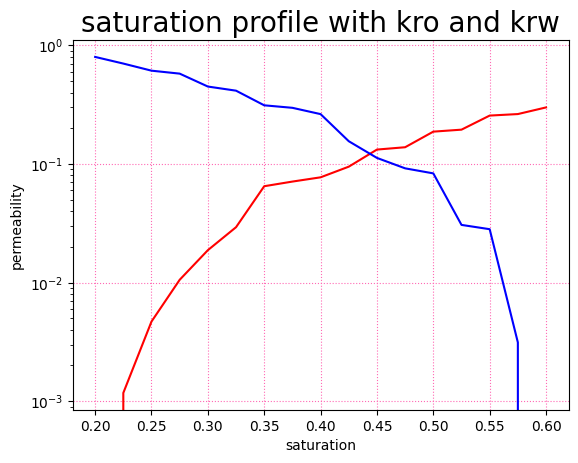

In [65]:
plt.plot(per['Sw'],per['krw'],linewidth=1.5,color='red')
plt.plot(per['Sw'],per['krow'],linewidth=1.5,color='blue')
#plt.xscale('log')
plt.title('saturation profile with kro and krw',size=20)
plt.xlabel('saturation')
plt.ylabel('permeability')
plt.grid(color='hotpink',ls=':')
plt.yscale('log')


In [66]:
Do=float(input('enter oil density'))
Dw=float(input('enter water density'))
IF=float(input('enter inter facial tensio'))

enter oil density0.8
enter water density1
enter inter facial tensio50


In [69]:
capillary=pd.DataFrame({'Sw':[25.6,25.6,25.7,26.0,27.0,29.0,31.0,34.2,37.8,41.5,46.2]})
capillary
capillary['depth']=np.arange(4000,5100,100)
capillary['depth1']=np.arange(5100,6200,100)
capillary['pc']=((Dw-Do)*capillary['depth'])/144
capillary['pc1']=((Dw-Do)*capillary['depth1'])/144
capillary

,Sw,depth,depth1,pc,pc1
0,25.6,4000,5100,5.555556,7.083333
1,25.6,4100,5200,5.694444,7.222222
2,25.7,4200,5300,5.833333,7.361111
3,26.0,4300,5400,5.972222,7.500000
4,27.0,4400,5500,6.111111,7.638889
5,29.0,4500,5600,6.250000,7.777778
6,31.0,4600,5700,6.388889,7.916667
7,34.2,4700,5800,6.527778,8.055556
8,37.8,4800,5900,6.666667,8.194444
9,41.5,4900,6000,6.805556,8.333333


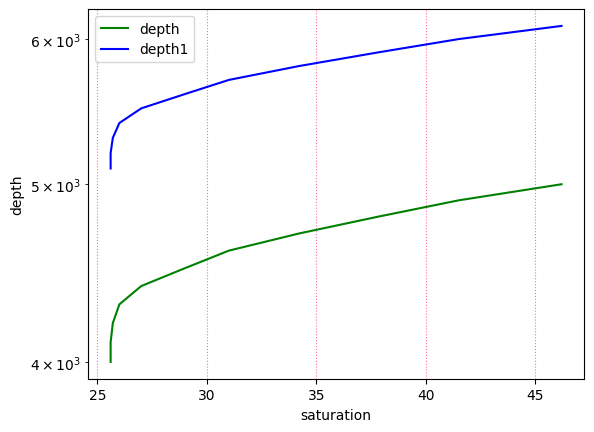

In [85]:
plt.plot(capillary['Sw'],capillary['depth'],label='depth',color='green')
plt.plot(capillary['Sw'],capillary['depth1'],label='depth1',color='blue')
plt.xlabel('saturation')
plt.ylabel('depth')
plt.grid(color='hotpink',ls=':')
plt.legend()
plt.yscale('log')

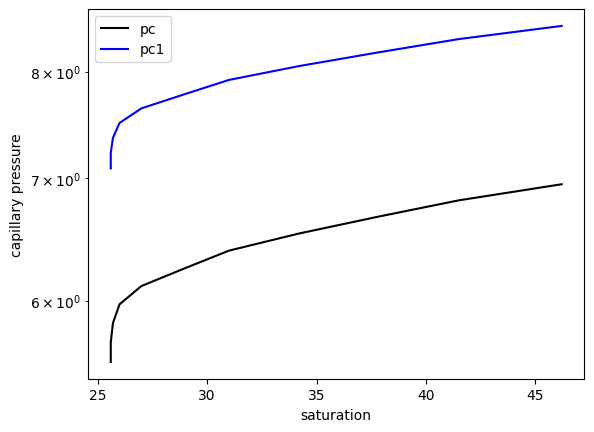

In [84]:
plt.plot(capillary['Sw'],capillary['pc'],label='pc',color='black')
plt.plot(capillary['Sw'],capillary['pc1'],label='pc1',color='blue')
plt.xlabel('saturation')
plt.ylabel('capillary pressure')
plt.legend()
plt.yscale('log')